# Study impact of $W_d$ cut
last edit Sep-8, 2022

## Imports and definitions

In [1]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
from sidis_analysis_tools         import *;
# from event_selection_tools        import *;

In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

# (1) Load data:
All runs of $(e,e'\pi)$ data and all runs of $(e,e'\pi n)$ - as with a small number of runs normalization is off

In [3]:
load_SIDIS_data( Nruns = 4,
                do_e_e_pi=True, 
                subdirname = "With_W0.5_cut",
                do_e_e_pi_n=False, 
                do_e_e_pi_FreeP=False,
                fdebug=1, do_all_vars=True)

Done loading files.

Total statistics:
2245132  d(e,e'π+)  events
1004797  d(e,e'π-)  events


# (2) Apply selection cuts not previously imposed
Except from $W$ cut

In [4]:
e_e_pi_pass_cuts,_,_,_ = apply_further_selection_cuts_to_data(doApply_minPn_cut=True, 
                                                              fdebug=2,                                                               
                                                              NeventsMax=-1);

Applying selection cuts not previously imposed
(1) d(e,e'π) data
Apply a π+/π- acceptance matching cut on the in p-theta plane
Applying p-theta on cut for piplus on 2245132 events
Subdividing into 4 subsets up to 500000 events
subset 0 of index 0-499999
subset 1 of index 500000-999999
subset 2 of index 1000000-1499999
subset 3 of index 1500000-1999999
Applying p-theta on cut for piminus on 1004797 events
Subdividing into 2 subsets up to 500000 events
subset 0 of index 0-499999
subset 1 of index 500000-999999
Apply a cut on the missing mass of a (e,e'π) reaction: 1.3<Mx<5.0 GeV/c2
(e,e π+ )
2245132 events after original cut (100.0 %)
1459860 events after p-theta cut (65.0 %)
1239009 events after Mx cut (55.2 %)
1239009 events after Kinematical cut (55.2 %)
(e,e π- )
1004797 events after original cut (100.0 %)
997547 events after p-theta cut (99.3 %)
879803 events after Mx cut (87.6 %)
879803 events after Kinematical cut (87.6 %)
 
Done applying event-selection cuts


# (3) plot $W$ vs. $W_d$ 

## (3.1) for all the data

2245132
1004797


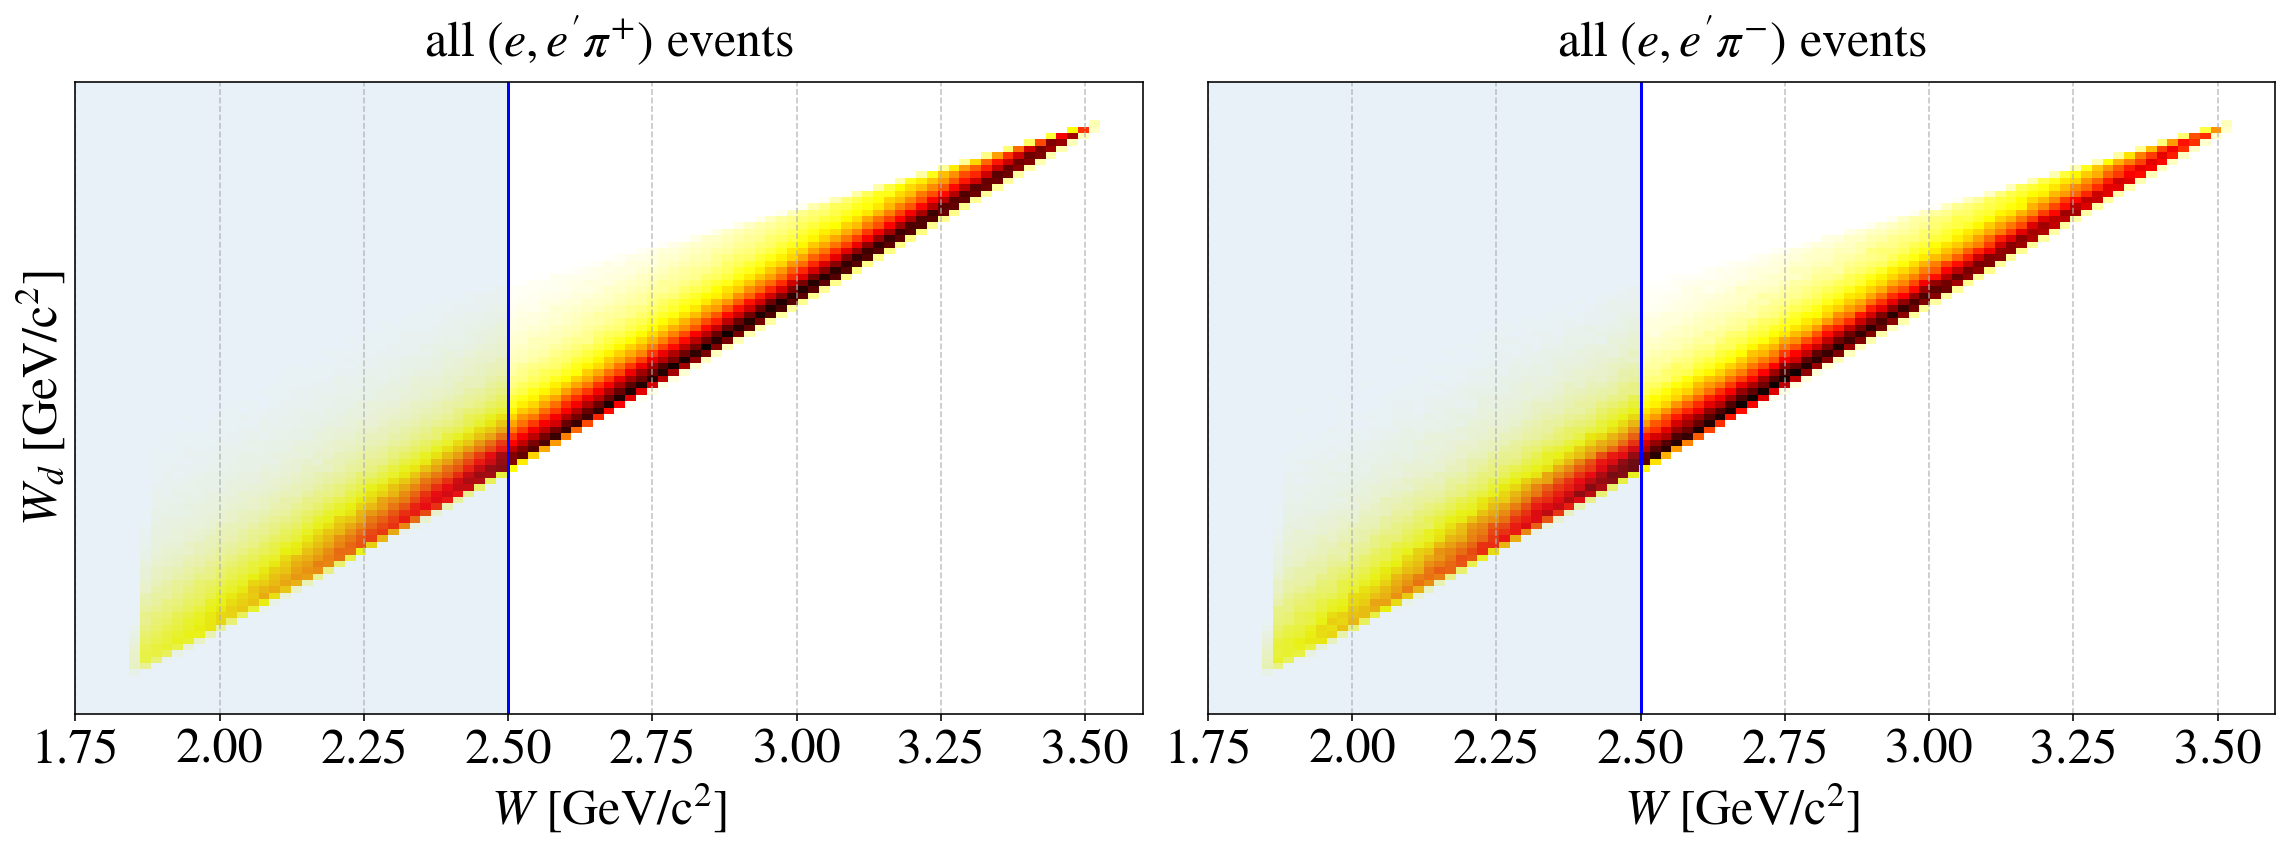

In [5]:
fig = plt.figure(figsize=(16,6), tight_layout=True)
for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,pi_labels,pi_colors,[1,2]):

    df = e_e_pi[pi_ch]
    print(len(df))

    
    ax = fig.add_subplot(1,2,pi_idx)
    plt.hist2d( df.W, df.W_d, bins=(np.linspace(1.75,3.6,100),np.linspace(3.1,5.5,100)), cmap='hot_r')

    plt.plot( [2.5,2.5],    ax.get_ylim(), '-b')
    plt.plot( ax.get_xlim(),[2.5,2.5],     '-b')
    plt.fill_between( [0,2.5], [6, 6] , 'k', alpha=0.1)
    
    set_axes(ax,'$W$ [GeV/c$^2$]',
             '$W_d$ [GeV/c$^2$]' if pi_idx==1 else '', remove_ticks_y= False if pi_idx==1 else True,
             title="all $(e,e'"+pi_label+")$ events",
             do_add_grid=True, do_add_legend=False)


## (3.1) for the data after all cuts except the $W$ cut

1239009
879803


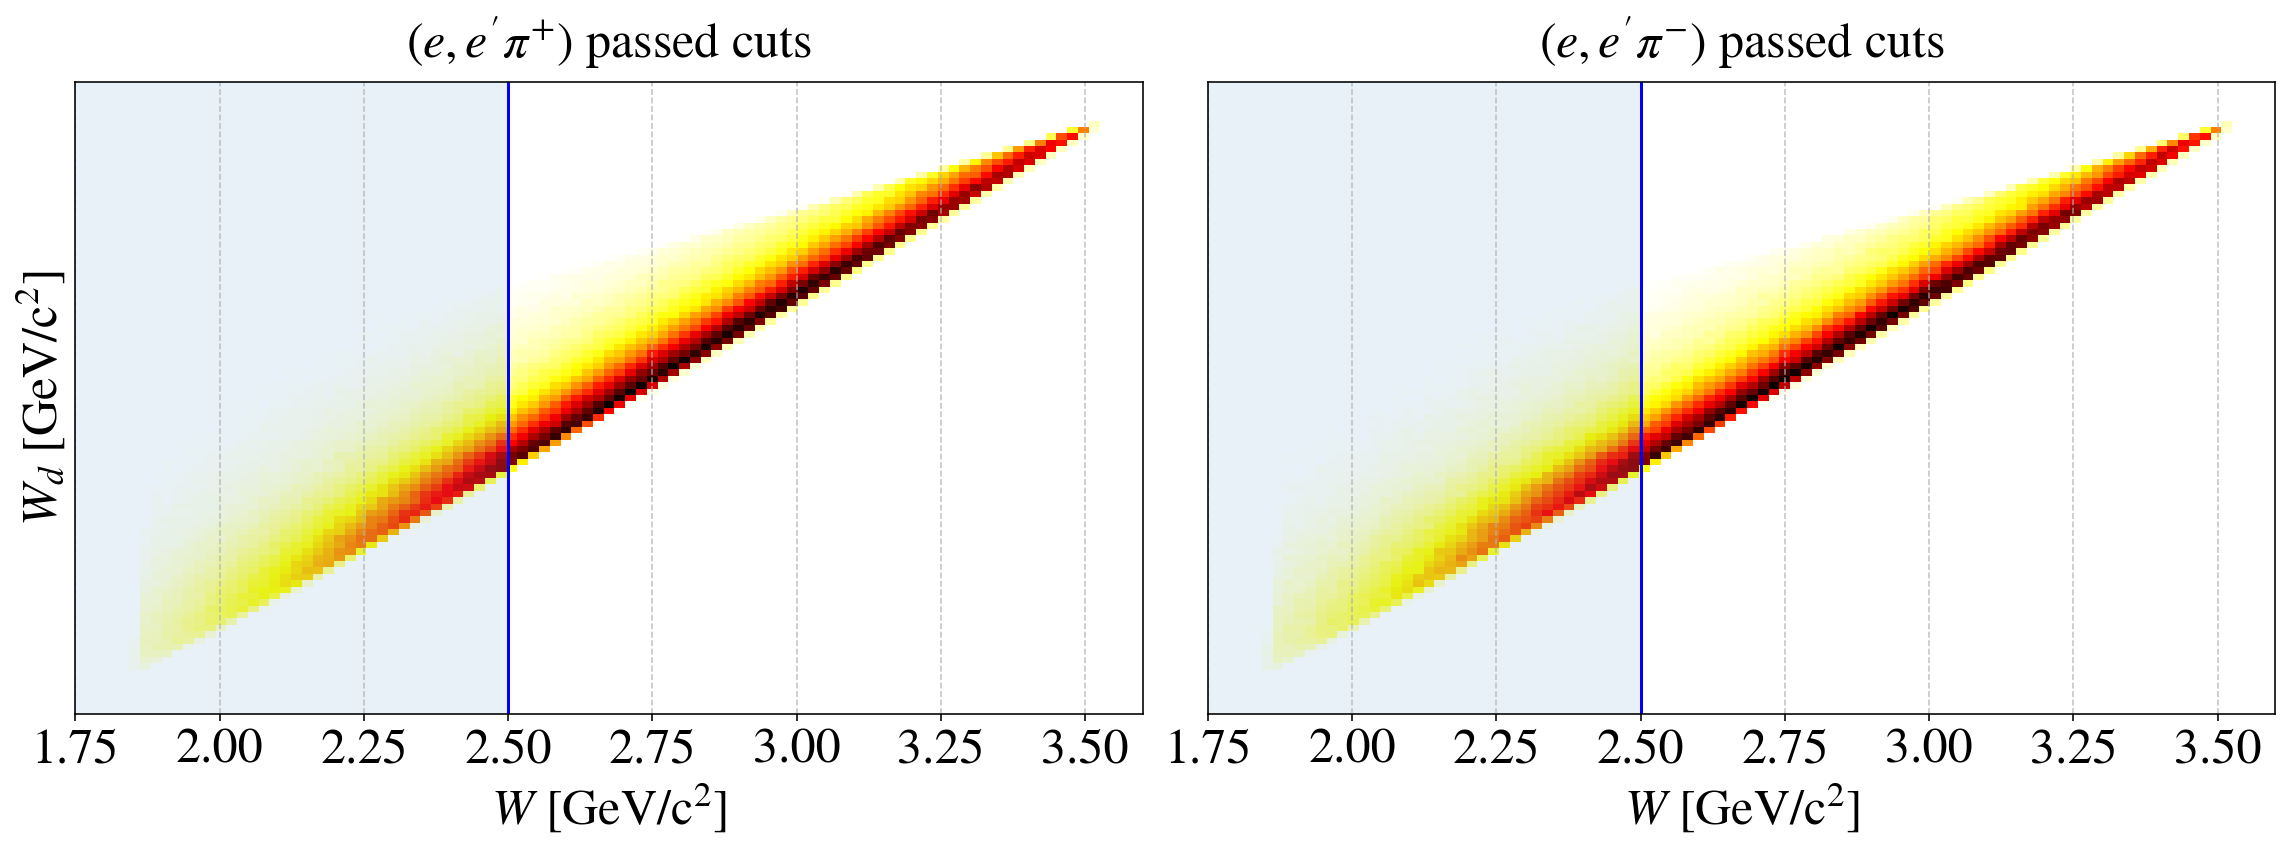

In [6]:
fig = plt.figure(figsize=(16,6), tight_layout=True)
for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,pi_labels,pi_colors,[1,2]):

    df = e_e_pi_pass_cuts[pi_ch]
    print(len(df))
    
    ax = fig.add_subplot(1,2,pi_idx)
    plt.hist2d( df.W, df.W_d, bins=(np.linspace(1.75,3.6,100),np.linspace(3.1,5.5,100)), cmap='hot_r')

    plt.plot( [2.5,2.5],    ax.get_ylim(), '-b')
    plt.plot( ax.get_xlim(),[2.5,2.5],     '-b')
    plt.fill_between( [0,2.5], [6, 6] , 'k', alpha=0.1)
    
    set_axes(ax,'$W$ [GeV/c$^2$]',
             '$W_d$ [GeV/c$^2$]' if pi_idx==1 else '', remove_ticks_y= False if pi_idx==1 else True,
             title="$(e,e'"+pi_label+")$ passed cuts",
             do_add_grid=True, do_add_legend=False)


# (4) Extract tabular data and save results to file

In [7]:
z_bins   = np.arange(0.3,0.85,0.05)
z_widths = 0.01*np.ones(len(z_bins))
x_bins   = np.linspace(0.2,0.6,11)
x        = (x_bins[1:] + x_bins[:-1])/2
x_err    = (x_bins[1:] - x_bins[:-1])/2
print('x bins:',x_bins)
print('z bins:',z_bins)
for z_bin,z_width in zip(z_bins,z_widths):
    z_min,z_max = z_bin-z_width, z_bin+z_width
    print('%.3f < z < %.3f:'%(z_min,z_max))
    
var_label = "standing proton x"
var    = 'xB'
xlabel = "Bjorken $x$"


x bins: [0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52 0.56 0.6 ]
z bins: [0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8 ]
0.290 < z < 0.310:
0.340 < z < 0.360:
0.390 < z < 0.410:
0.440 < z < 0.460:
0.490 < z < 0.510:
0.540 < z < 0.560:
0.590 < z < 0.610:
0.640 < z < 0.660:
0.690 < z < 0.710:
0.740 < z < 0.760:
0.790 < z < 0.810:


## (4.1) no cut on $W$

In [8]:
extract_SIDIS_ratio(df_dict  = e_e_pi_pass_cuts,
                    data_path= '/Users/erezcohen/Desktop/data/BAND/Results/ImpactOfWcut/',
                    x_var    = var ,                           
                    x_bins   = x_bins,                           
                    z_bins   = z_bins,                           
                    z_widths = z_widths,                           
                    fdebug   = 0,
                    prefix   = 'Untagged_SIDIS_ratio_',                           
                    suffix   = 'No_W_cut')

saved /Users/erezcohen/Desktop/data/BAND/Results/ImpactOfWcut/Untagged_SIDIS_ratio_Zmin0.290_Zmean_pips0.305_pims0.305_Zmax0.310No_W_cut.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/ImpactOfWcut/Untagged_SIDIS_ratio_Zmin0.340_Zmean_pips0.350_pims0.350_Zmax0.360No_W_cut.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/ImpactOfWcut/Untagged_SIDIS_ratio_Zmin0.390_Zmean_pips0.400_pims0.400_Zmax0.410No_W_cut.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/ImpactOfWcut/Untagged_SIDIS_ratio_Zmin0.440_Zmean_pips0.450_pims0.450_Zmax0.460No_W_cut.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/ImpactOfWcut/Untagged_SIDIS_ratio_Zmin0.490_Zmean_pips0.500_pims0.500_Zmax0.510No_W_cut.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/ImpactOfWcut/Untagged_SIDIS_ratio_Zmin0.540_Zmean_pips0.550_pims0.550_Zmax0.560No_W_cut.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/ImpactOfWcut/Untagged_SIDIS_ratio_Zmin0.590_Zmean_pips0.600_pims0.600_Zmax0.610No_W_cut.csv
saved /Users/

Reading files from /Users/erezcohen/Desktop/data/BAND/Results/ImpactOfWcut/
reading Untagged_SIDIS_ratio_Zmin0.390_Zmean_pips0.400_pims0.400_Zmax0.410No_W_cut.csv
reading Untagged_SIDIS_ratio_Zmin0.790_Zmean_pips0.799_pims0.800_Zmax0.810No_W_cut.csv
reading Untagged_SIDIS_ratio_Zmin0.290_Zmean_pips0.305_pims0.305_Zmax0.310No_W_cut.csv
reading Untagged_SIDIS_ratio_Zmin0.340_Zmean_pips0.350_pims0.350_Zmax0.360No_W_cut.csv
reading Untagged_SIDIS_ratio_Zmin0.440_Zmean_pips0.450_pims0.450_Zmax0.460No_W_cut.csv
reading Untagged_SIDIS_ratio_Zmin0.540_Zmean_pips0.550_pims0.550_Zmax0.560No_W_cut.csv
reading Untagged_SIDIS_ratio_Zmin0.740_Zmean_pips0.750_pims0.750_Zmax0.760No_W_cut.csv
reading Untagged_SIDIS_ratio_Zmin0.640_Zmean_pips0.650_pims0.650_Zmax0.660No_W_cut.csv
reading Untagged_SIDIS_ratio_Zmin0.490_Zmean_pips0.500_pims0.500_Zmax0.510No_W_cut.csv
reading Untagged_SIDIS_ratio_Zmin0.690_Zmean_pips0.700_pims0.700_Zmax0.710No_W_cut.csv
reading Untagged_SIDIS_ratio_Zmin0.590_Zmean_pips0.600

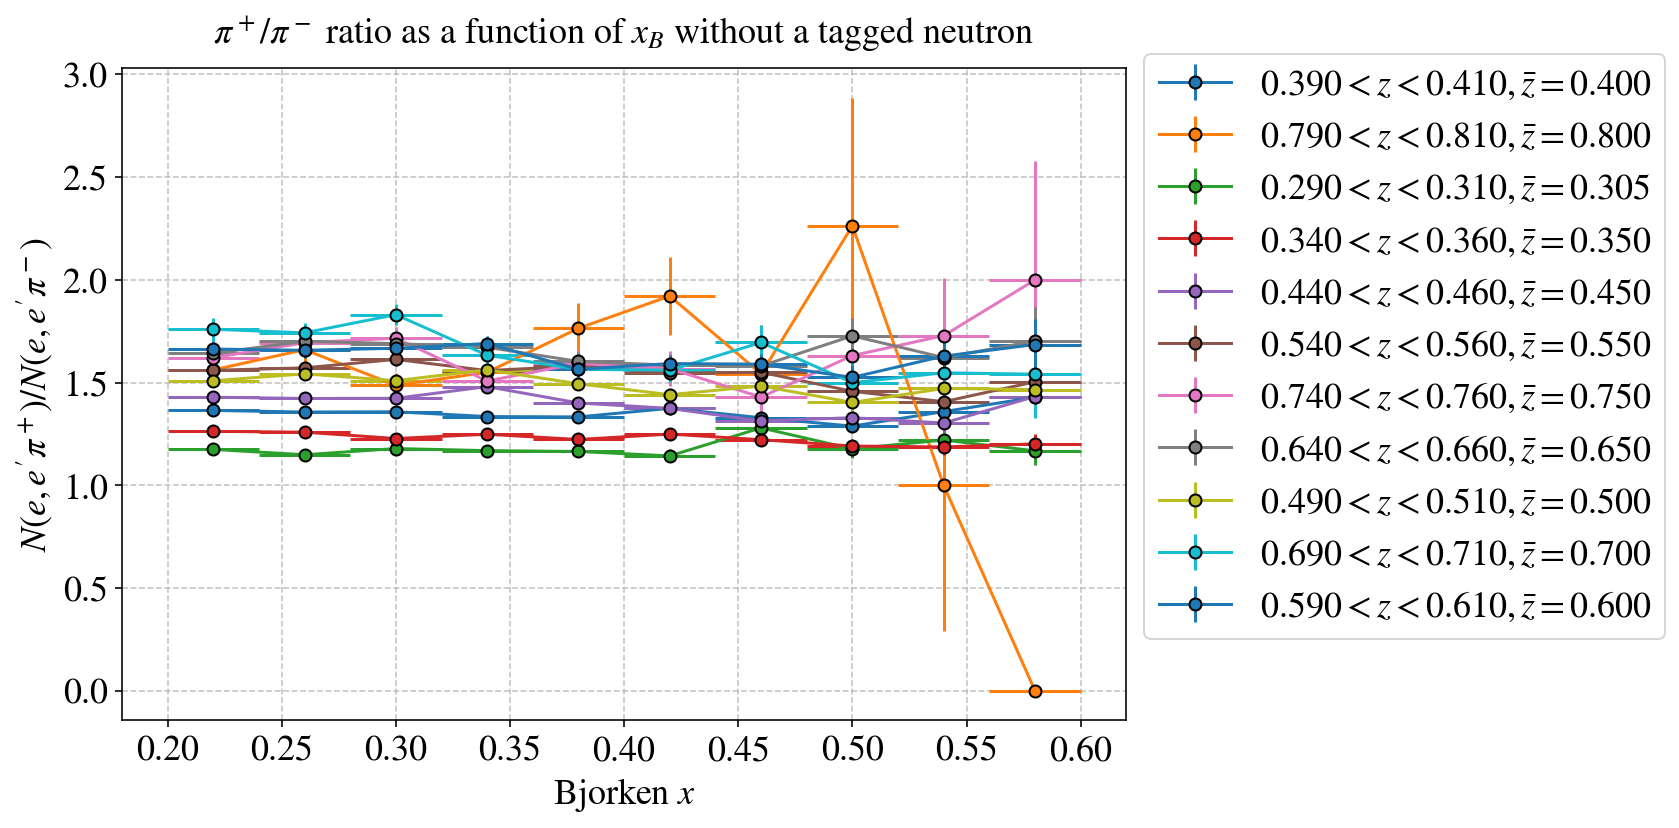

In [9]:
prefix = 'Untagged_SIDIS_ratio_'
suffix = 'No_W_cut'
SIDIS_results = load_SIDIS_ratio(prefix = prefix, suffix = suffix, doPlotResults=True,
                                 data_path='/Users/erezcohen/Desktop/data/BAND/Results/ImpactOfWcut/')
# ax = plt.gca()
# ax.set_ylim(1,2.5);

## (4.2) With a cut on $W>2.5$

In [10]:
extract_SIDIS_ratio(df_dict  = e_e_pi_pass_cuts,
                    data_path= '/Users/erezcohen/Desktop/data/BAND/Results/ImpactOfWcut/',
                    x_var    = var ,                           
                    x_bins   = x_bins,                           
                    z_bins   = z_bins,                           
                    z_widths = z_widths, 
                    W_min    = 2.5,
                    fdebug   = 0,
                    prefix   = 'Untagged_SIDIS_ratio_',                           
                    suffix   = 'With_W2.5_cut')

saved /Users/erezcohen/Desktop/data/BAND/Results/ImpactOfWcut/Untagged_SIDIS_ratio_Zmin0.290_Zmean_pips0.305_pims0.305_Zmax0.310With_W2.5_cut.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/ImpactOfWcut/Untagged_SIDIS_ratio_Zmin0.340_Zmean_pips0.350_pims0.350_Zmax0.360With_W2.5_cut.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/ImpactOfWcut/Untagged_SIDIS_ratio_Zmin0.390_Zmean_pips0.400_pims0.400_Zmax0.410With_W2.5_cut.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/ImpactOfWcut/Untagged_SIDIS_ratio_Zmin0.440_Zmean_pips0.450_pims0.450_Zmax0.460With_W2.5_cut.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/ImpactOfWcut/Untagged_SIDIS_ratio_Zmin0.490_Zmean_pips0.500_pims0.500_Zmax0.510With_W2.5_cut.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/ImpactOfWcut/Untagged_SIDIS_ratio_Zmin0.540_Zmean_pips0.550_pims0.550_Zmax0.560With_W2.5_cut.csv
saved /Users/erezcohen/Desktop/data/BAND/Results/ImpactOfWcut/Untagged_SIDIS_ratio_Zmin0.590_Zmean_pips0.600_pims0.600_Zmax0

Reading files from /Users/erezcohen/Desktop/data/BAND/Results/ImpactOfWcut/
reading Untagged_SIDIS_ratio_Zmin0.740_Zmean_pips0.750_pims0.750_Zmax0.760With_W2.5_cut.csv
reading Untagged_SIDIS_ratio_Zmin0.540_Zmean_pips0.550_pims0.550_Zmax0.560With_W2.5_cut.csv
reading Untagged_SIDIS_ratio_Zmin0.340_Zmean_pips0.350_pims0.350_Zmax0.360With_W2.5_cut.csv
reading Untagged_SIDIS_ratio_Zmin0.390_Zmean_pips0.400_pims0.400_Zmax0.410With_W2.5_cut.csv
reading Untagged_SIDIS_ratio_Zmin0.790_Zmean_pips0.800_pims0.800_Zmax0.810With_W2.5_cut.csv
reading Untagged_SIDIS_ratio_Zmin0.690_Zmean_pips0.700_pims0.700_Zmax0.710With_W2.5_cut.csv
reading Untagged_SIDIS_ratio_Zmin0.640_Zmean_pips0.650_pims0.650_Zmax0.660With_W2.5_cut.csv
reading Untagged_SIDIS_ratio_Zmin0.590_Zmean_pips0.600_pims0.600_Zmax0.610With_W2.5_cut.csv
reading Untagged_SIDIS_ratio_Zmin0.490_Zmean_pips0.500_pims0.500_Zmax0.510With_W2.5_cut.csv
reading Untagged_SIDIS_ratio_Zmin0.440_Zmean_pips0.450_pims0.450_Zmax0.460With_W2.5_cut.csv
read

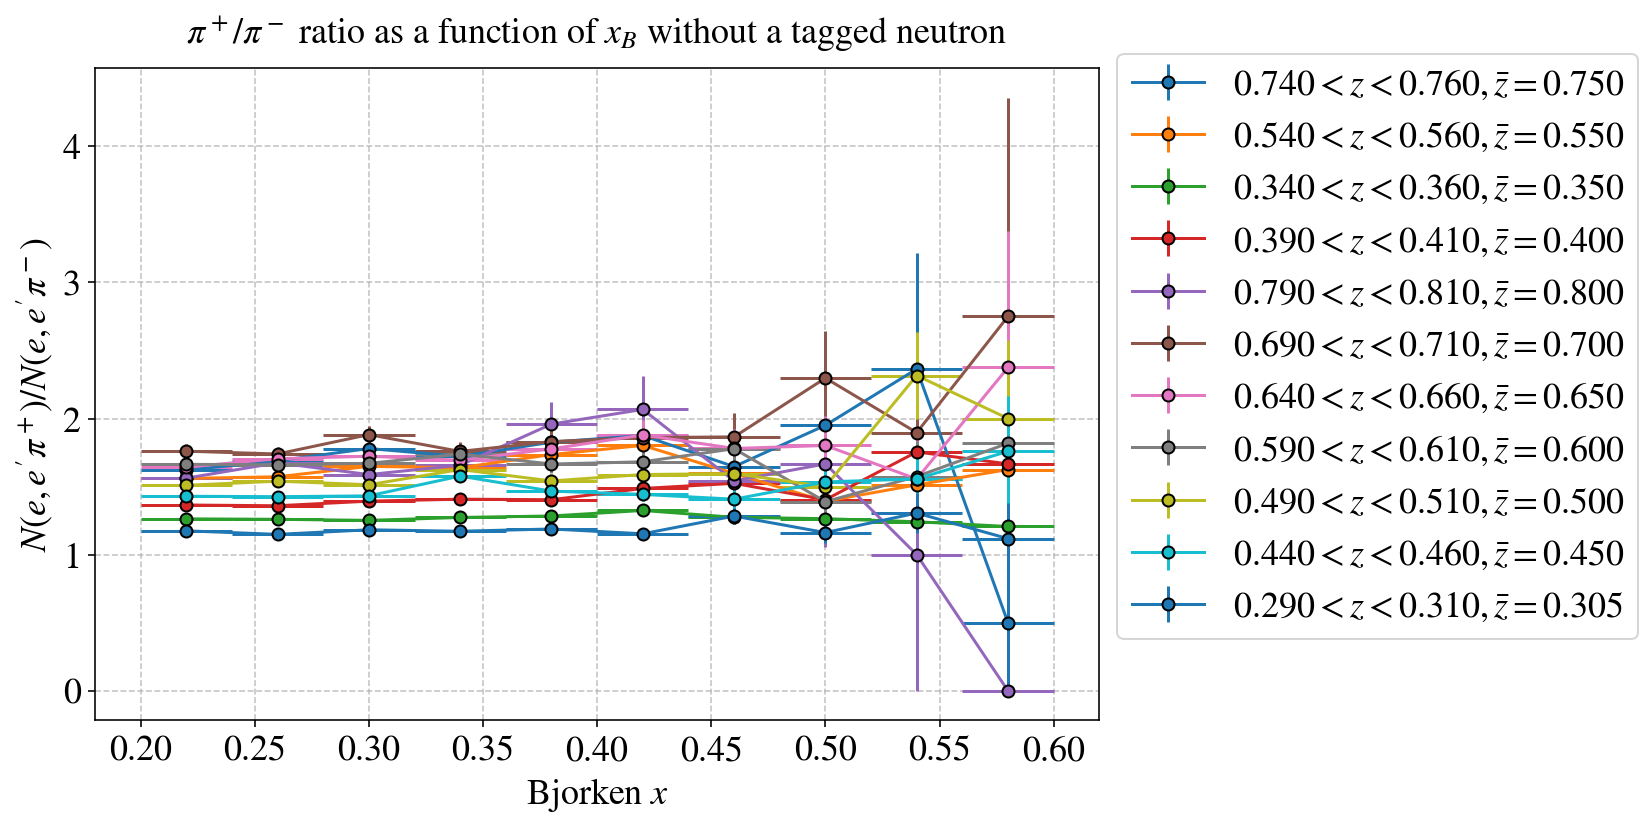

In [11]:
prefix = 'Untagged_SIDIS_ratio_'
suffix = 'With_W2.5_cut'
SIDIS_results = load_SIDIS_ratio(prefix = prefix, suffix = suffix, doPlotResults=True,data_path='/Users/erezcohen/Desktop/data/BAND/Results/ImpactOfWcut/')



## (4.3) Compare with and without $W$ cut

In [12]:
SIDIS_res = dict()
prefix = 'Untagged_SIDIS_ratio_'
for suffix in ['No_W_cut','With_W2.5_cut']:
    SIDIS_res[suffix] = load_SIDIS_ratio(prefix = prefix, suffix = suffix, 
                                         doPlotResults=False, 
                                         data_path='/Users/erezcohen/Desktop/data/BAND/Results/ImpactOfWcut/')
print('Done.')

Reading files from /Users/erezcohen/Desktop/data/BAND/Results/ImpactOfWcut/
reading Untagged_SIDIS_ratio_Zmin0.390_Zmean_pips0.400_pims0.400_Zmax0.410No_W_cut.csv
reading Untagged_SIDIS_ratio_Zmin0.790_Zmean_pips0.799_pims0.800_Zmax0.810No_W_cut.csv
reading Untagged_SIDIS_ratio_Zmin0.290_Zmean_pips0.305_pims0.305_Zmax0.310No_W_cut.csv
reading Untagged_SIDIS_ratio_Zmin0.340_Zmean_pips0.350_pims0.350_Zmax0.360No_W_cut.csv
reading Untagged_SIDIS_ratio_Zmin0.440_Zmean_pips0.450_pims0.450_Zmax0.460No_W_cut.csv
reading Untagged_SIDIS_ratio_Zmin0.540_Zmean_pips0.550_pims0.550_Zmax0.560No_W_cut.csv
reading Untagged_SIDIS_ratio_Zmin0.740_Zmean_pips0.750_pims0.750_Zmax0.760No_W_cut.csv
reading Untagged_SIDIS_ratio_Zmin0.640_Zmean_pips0.650_pims0.650_Zmax0.660No_W_cut.csv
reading Untagged_SIDIS_ratio_Zmin0.490_Zmean_pips0.500_pims0.500_Zmax0.510No_W_cut.csv
reading Untagged_SIDIS_ratio_Zmin0.690_Zmean_pips0.700_pims0.700_Zmax0.710No_W_cut.csv
reading Untagged_SIDIS_ratio_Zmin0.590_Zmean_pips0.600

In [13]:
z_arr,z_err_arr,R_arr,R_errup_arr,R_errdw_arr = dict(),dict(),dict(),dict(),dict()
for suffix in ['No_W_cut','With_W2.5_cut']:
    # print(suffix)
    results = SIDIS_res[suffix]
    z_arr[suffix],z_err_arr[suffix],R_arr[suffix],R_errup_arr[suffix],R_errdw_arr[suffix] = [],[],[],[],[]
    for key in results.keys():
        # print(key)
        z_min = float(key[4:9])
        z_max = float(key[-4:])

        # print(z_min,'<z<',z_max)
        res_x034 = results[key][np.abs(results[key]['$x_B$']-0.34)<0.02]
        # print(results[key])
        R,dR_up,dR_dw = float(res_x034['$R$']),float(res_x034['$\Delta R_{+}$']),float(res_x034['$\Delta R_{+}$'])
        # print(R,dR_up,dR_dw)
        
        R_arr[suffix].append( R )
        R_errup_arr[suffix].append( dR_up )
        R_errdw_arr[suffix].append( dR_dw )        

        z_arr[suffix].append( (z_max + z_min)/2 )
        z_err_arr[suffix].append( (z_max - z_min)/2 )
        
print('Done.')

Done.


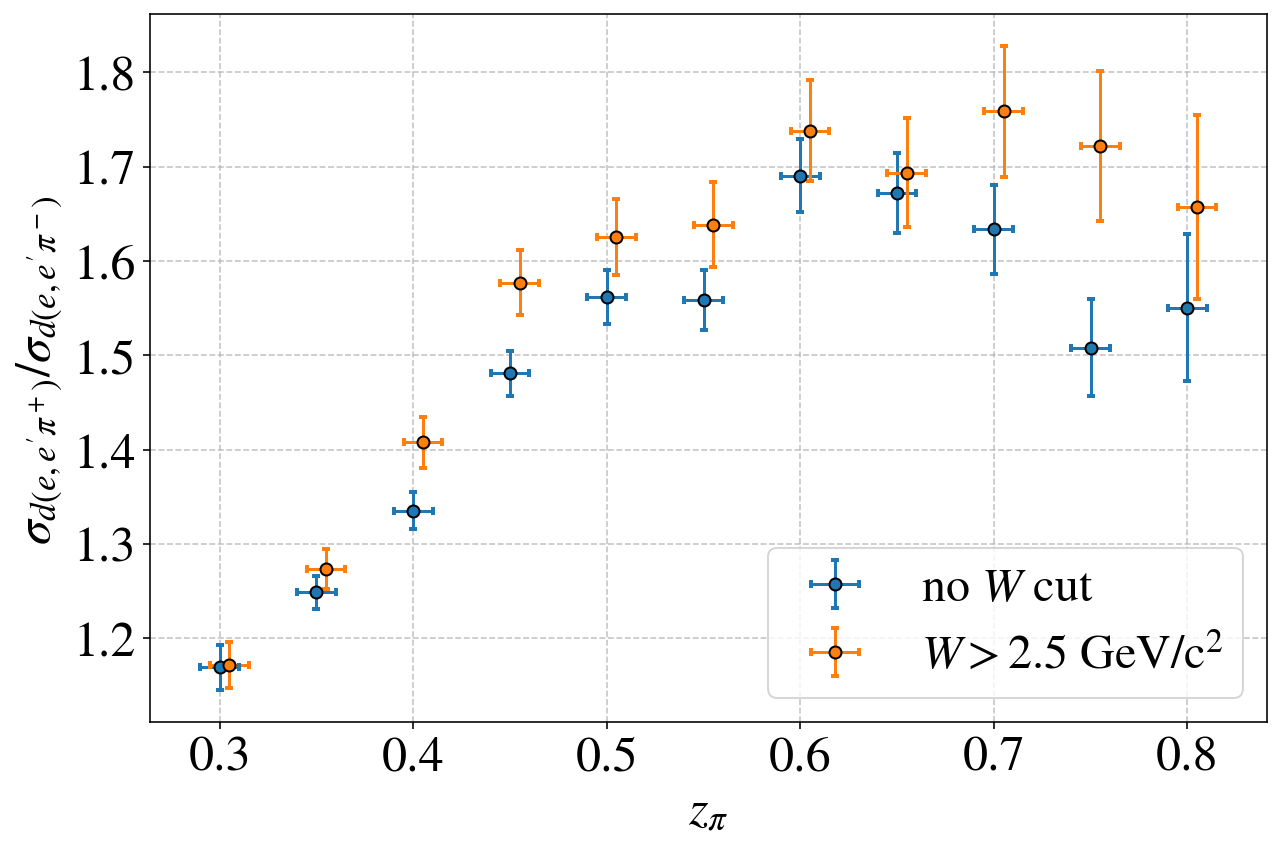

In [14]:
fig = plt.figure(figsize=(9,6), tight_layout=True)
ax = fig.add_subplot(1,1,1)

for suffix,sufname,sufidx in zip(['No_W_cut','With_W2.5_cut'],
                                 ['no $W$ cut','$W>2.5$ GeV/c$^2$'],
                                 [0,1]):
    plt.errorbar(x=np.array(z_arr[suffix])+sufidx*0.005, xerr=z_err_arr[suffix],
                 y=R_arr[suffix], yerr=(R_errup_arr[suffix],R_errdw_arr[suffix]),
                 marker='o',markeredgecolor='k',linestyle='None',
                 label=sufname, capthick=2, capsize=2)

set_axes(ax,'$z_\\pi$',
             "$\\sigma_{d(e,e'\\pi^+)}/\\sigma_{d(e,e'\\pi^-)}$ ",
             do_add_grid=True, do_add_legend=True)
ax.legend(loc='lower right',fontsize=24);

In [15]:
z_arr['No_W_cut']

[0.4, 0.8, 0.3, 0.35, 0.45, 0.55, 0.75, 0.65, 0.5, 0.7, 0.6]